In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/en.openfoodfacts.org.products.tsv", sep = "\t")
df = df[["nutrition-score-fr_100g", "additives", "ingredients_text"]]
clust_df = pd.read_csv("../data/clust_df.csv", index_col = 0)
clust_df = clust_df.drop(["ingredients_text","clust"],axis=1)
display(clust_df)

c:\users\samre\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,carbohydrates_100g,fiber_100g,sugars_100g,proteins_100g,fat_100g,saturated-fat_100g
2,1.119606,1.255472,0.371259,0.859435,0.137917,-0.700412
30,0.866017,1.141316,-0.250363,-0.346552,0.772444,3.068281
148,1.896869,2.083100,3.082730,-1.065403,-0.795579,-0.700412
149,1.181114,1.369627,2.295565,-0.795968,-0.795579,-0.700412
171,-0.279261,3.024883,-0.435906,1.090071,1.817792,-0.229855
...,...,...,...,...,...,...
355083,-0.815304,1.740633,-0.376465,1.090071,0.249769,-0.191702
355269,-0.966496,-0.770789,-0.620892,0.202016,-0.795579,-0.700412
355474,-0.843825,-0.770789,-0.422573,1.244187,0.230953,0.561472
355525,-0.956188,-0.770789,-0.604227,0.314100,-0.267678,-0.262356


In [3]:
sup_df = clust_df.join(df).dropna()[["nutrition-score-fr_100g","additives","ingredients_text"]]
sup_df.to_csv("../data/sup_df.csv")
display(sup_df)

,nutrition-score-fr_100g,additives,ingredients_text
2,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,"Peanuts, wheat flour, sugar, rice flour, tapio..."
148,8.0,[ cranberries -> en:cranberries ] [ sugar -...,"Cranberries, sugar, sunflower oil."
149,8.0,[ apricots -> en:apricots ] [ sulfur-dioxid...,"Apricots, sulfur dioxide."
200,18.0,[ wheat-flour -> en:wheat-flour ] [ flour -...,"Wheat flour, butter (cream), water, yeast, sug..."
201,14.0,[ enriched-wheat-flour -> en:enriched-wheat-f...,"Enriched wheat flour (wheat flour, malted barl..."
...,...,...,...
355083,0.0,[ almonds -> en:almonds ],Almonds
355269,0.0,[ shrimp -> en:shrimp ] [ salt -> en:salt ],"Shrimp, salt"
355474,19.0,[ beef -> en:beef ] [ sugar -> en:sugar ] ...,"Beef, sugar, salt, tomato paste, garlic, spice..."
355525,0.0,[ eggs -> en:eggs ],Eggs


In [4]:
import sklearn.feature_extraction.text as text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import re

display(df.head())
print(df.shape)

,nutrition-score-fr_100g,additives,ingredients_text
0,NaN,NaN,NaN
1,14.0,[ bananas -> en:bananas ] [ vegetable-oil -...,"Bananas, vegetable oil (coconut oil, corn oil ..."
2,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,"Peanuts, wheat flour, sugar, rice flour, tapio..."
3,12.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,"Organic hazelnuts, organic cashews, organic wa..."
4,NaN,[ organic-polenta -> en:organic-polenta ] [...,Organic polenta


(356027, 3)


In [5]:
my_stop_words = set( stopwords.words('english')+ \
                    ['de', 'contains', 's', 'et', 'of', 'en', "fr",'less', 'p', 'exists', 'following', 'ok'])

clean_additives = lambda s: re.sub(r'[^a-z- ]+' , " ", s.lower().replace("en:","").replace("->","")).strip()
print(clean_additives("[ peanuts -> en:peanuts ] [ wheat-flour ->")  )

clean_ingre = lambda s: " ".join( map( lambda s1: s1.strip().replace(" ", "-") , s.lower().replace(".","").replace("(",",").replace(")",",").split(",") ) )
print(clean_ingre("Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor."))


peanuts  peanuts     wheat-flour
bananas vegetable-oil coconut-oil corn-oil-and/or-palm-oil sugar natural-banana-flavor


"Briefly, the FSA score was computed for each food and beverage on the basis of the nutrient content per 100 g. Positive points (0 to +10) are allocated for the content of energy (kJ), SFA (g), total sugar (g), and sodium (mg), while negative points (0 to −5) are allocated for the content of fruits/vegetables/nuts (g), dietary fiber (g), and protein (g). Scores for foods and beverages are thus based on a discrete continuous scale theoretically ranging from −15 (most healthy) to +40 (least healthy)"
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5598004/#:~:text=Aggregated%20scores%20at%20the%20individual,for%20all%20foods%20and%20beverages

In [6]:
from nltk.stem import PorterStemmer

df_clean = sup_df.copy().reset_index()
df_clean["additives"] = df_clean["additives"].apply(clean_additives)
df_clean["ingredients_text"] = df_clean["ingredients_text"].apply(clean_ingre)

display(df_clean)


,index,nutrition-score-fr_100g,additives,ingredients_text
0,2,0.0,peanuts peanuts wheat-flour wheat-flou...,peanuts wheat-flour sugar rice-flour tapioca-s...
1,148,8.0,cranberries cranberries sugar sugar ...,cranberries sugar sunflower-oil
2,149,8.0,apricots apricots sulfur-dioxide e ...,apricots sulfur-dioxide
3,200,18.0,wheat-flour wheat-flour flour flour ...,wheat-flour butter cream water yeast sugar sa...
4,201,14.0,enriched-wheat-flour enriched-wheat-flour ...,enriched-wheat-flour wheat-flour malted-barley...
...,...,...,...,...
12217,355083,0.0,almonds almonds,almonds
12218,355269,0.0,shrimp shrimp salt salt,shrimp salt
12219,355474,19.0,beef beef sugar sugar salt salt...,beef sugar salt tomato-paste garlic spices mon...
12220,355525,0.0,eggs eggs,eggs


Below: stuff for manually limiting vocabulary or stemming.

Not really needed anymore, can just ignore

In [7]:
# my_vocab=["cocoa-butter", "soy-lecithin", "chocolate-liquor", "vanilla", "butter", \
#           "corn-syrup", "red-40", "yellow-5", "natural-and-artificial-flavors", "gelatin", \
#           "niacin", "riboflavin", "folic-acid", "iron", "ferrous-sulfate", \
#           "almonds", "peanuts", "peanut-oil", "pecans", "walnuts", \
#           "enzymes", "pasteurized-milk", "cheese-culture", "cheese-cultures","pasteurized-part-skim-milk", \
#           "citric-acid", "green-beans", "ascorbic-acid", "tomatoes", "vitamin-d3", \
#           "shrimp", "sodium-tripolyphosphate", "sodium-nitrite", "sodium-erythorbate"]

# port=PorterStemmer()
# my_vocab=set([port.stem(s) for s in my_vocab])
# print( my_vocab)

# def my_stem(s):
#     return " ".join(re.split("-| ",s))
# print(df_clean["additives"].apply(my_stem))

Vectorize either with TF-IDF or Bag-of-Words (count vectorizer)

In [8]:
vectorizer = text.TfidfVectorizer(strip_accents="unicode",stop_words=my_stop_words, \
                                  ngram_range=(1,1),max_features=30, \
                                  encoding="utf-8", token_pattern=r"(?u)\S\S+")
# vectorizer = text.CountVectorizer(strip_accents="unicode",stop_words=my_stop_words, \
#                                   ngram_range=(1,1),max_features=30, \
#                                   encoding="utf-8", token_pattern=r"(?u)\S\S+")
vectors = vectorizer.fit_transform(df_clean["additives"])
feature_names = vectorizer.get_feature_names()
print(len(feature_names))
dense = vectors.todense()

feature_names = ["ADD:"+fn for fn in feature_names]
df_additive_features = pd.DataFrame(dense, columns=feature_names)

display(df_additive_features)

30


,ADD:--,ADD:acid,ADD:almonds,ADD:butter,ADD:cheese-culture,ADD:citric-acid,ADD:corn-syrup,ADD:cream,ADD:culture,ADD:enzymes,...,ADD:salt,ADD:sea-salt,ADD:semolina,ADD:soy-lecithin,ADD:starch,ADD:sugar,ADD:syrup,ADD:thiamin-mononitrate,ADD:water,ADD:wheat-flour
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.294725,0.0,0.0,0.0,0.671666,0.194167,0.0,0.0,0.198986,0.306027
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.619826,0.0,0.0,0.000000,0.000000
2,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.106418,0.000000,0.0,0.432528,0.0,0.000000,0.0,0.462793,0.0,0.346258,...,0.195576,0.0,0.0,0.0,0.000000,0.257694,0.0,0.0,0.264089,0.406151
4,0.167177,0.204148,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.233395,0.134941,0.0,0.0,0.138290,0.425361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
12218,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
12219,0.647900,0.000000,0.0,0.000000,0.0,0.386262,0.0,0.000000,0.0,0.000000,...,0.396903,0.0,0.0,0.0,0.000000,0.522967,0.0,0.0,0.000000,0.000000
12220,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [9]:
vectorizer = text.TfidfVectorizer(strip_accents="unicode",stop_words=my_stop_words, \
                                  ngram_range=(1,1),max_features=30, \
                                  encoding="utf-8", token_pattern=r"(?u)\S\S+")
# vectorizer = text.CountVectorizer(strip_accents="unicode",stop_words=my_stop_words, \
#                                   ngram_range=(1,1),max_features=30, \
#                                   encoding="utf-8", token_pattern=r"(?u)\S\S+")
vectors = vectorizer.fit_transform(df_clean["ingredients_text"])
feature_names = vectorizer.get_feature_names()
# print(len(feature_names))
dense = vectors.todense()

feature_names = ["ING:"+fn for fn in feature_names]
df_ingre_features = pd.DataFrame(dense, columns=feature_names)

display(df_ingre_features)

,ING:almonds,ING:cheese-culture,ING:citric-acid,ING:cocoa-butter,ING:corn,ING:corn-syrup,ING:cream,ING:dextrose,ING:enzymes,ING:ferrous-sulfate,...,ING:sea-salt,ING:semolina,ING:soy-lecithin,ING:spices,ING:sugar,ING:thiamin-mononitrate,ING:thiamine-mononitrate,ING:water,ING:wheat,ING:wheat-flour
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.260082,0.0,0.000000,0.267977,0.511788,0.443854
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.554896,0.0,0.411416,0.0,...,0.0,0.0,0.0,0.000000,0.304961,0.0,0.000000,0.314219,0.000000,0.520445
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.218663,0.0,0.395347,0.225301,0.000000,0.373168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
12218,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
12219,0.0,0.0,0.544436,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.682176,0.380248,0.0,0.000000,0.000000,0.000000,0.000000
12220,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [10]:
df_features = pd.concat([df_additive_features, df_ingre_features, df_clean["nutrition-score-fr_100g"]], axis=1)
df_features=df_features.drop(["ADD:--"],axis=1) # drop this, it's a garbage attribute
display(df_features)
# df_features.to_csv("../data/count_features.csv")
df_features.to_csv("../data/tfidf_features.csv")

,ADD:acid,ADD:almonds,ADD:butter,ADD:cheese-culture,ADD:citric-acid,ADD:corn-syrup,ADD:cream,ADD:culture,ADD:enzymes,ADD:flavor,...,ING:semolina,ING:soy-lecithin,ING:spices,ING:sugar,ING:thiamin-mononitrate,ING:thiamine-mononitrate,ING:water,ING:wheat,ING:wheat-flour,nutrition-score-fr_100g
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.260082,0.0,0.000000,0.267977,0.511788,0.443854,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.0
3,0.000000,0.0,0.432528,0.0,0.000000,0.0,0.462793,0.0,0.346258,0.00000,...,0.0,0.0,0.000000,0.304961,0.0,0.000000,0.314219,0.000000,0.520445,18.0
4,0.204148,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.20509,...,0.0,0.0,0.000000,0.218663,0.0,0.395347,0.225301,0.000000,0.373168,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
12218,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
12219,0.000000,0.0,0.000000,0.0,0.386262,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.682176,0.380248,0.0,0.000000,0.000000,0.000000,0.000000,19.0
12220,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


-12.0 34.0


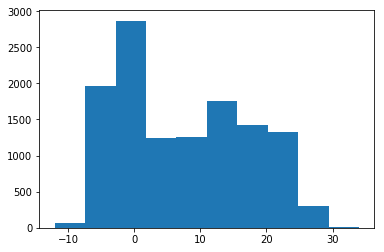

In [11]:
plt.hist(df_features["nutrition-score-fr_100g"])
print(min(df_features["nutrition-score-fr_100g"]), max(df_features["nutrition-score-fr_100g"]))

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_features, test_size=0.15, random_state=69)

print(train.shape, test.shape)
display(train)

display(df_features.describe())

baseline_mse = np.mean( (test["nutrition-score-fr_100g"] - np.mean(train["nutrition-score-fr_100g"]))**2 )
print(baseline_mse)

(10388, 60) (1834, 60)


,ADD:acid,ADD:almonds,ADD:butter,ADD:cheese-culture,ADD:citric-acid,ADD:corn-syrup,ADD:cream,ADD:culture,ADD:enzymes,ADD:flavor,...,ING:semolina,ING:soy-lecithin,ING:spices,ING:sugar,ING:thiamin-mononitrate,ING:thiamine-mononitrate,ING:water,ING:wheat,ING:wheat-flour,nutrition-score-fr_100g
7799,0.422163,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.406862,0.0,0.000000,0.000000,0.0,0.415813,0.000000,0.0,0.0,-6.0
10362,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.736857,0.410727,0.0,0.000000,0.423196,0.0,0.0,8.0
8353,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.607541,0.0,0.000000,0.625984,0.0,0.0,-1.0
1878,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0
702,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.28402,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,10.0
9818,0.569186,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,-4.0
10859,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,-6.0
4041,0.000000,0.870006,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.501224,0.0,0.000000,0.000000,0.0,0.0,11.0


,ADD:acid,ADD:almonds,ADD:butter,ADD:cheese-culture,ADD:citric-acid,ADD:corn-syrup,ADD:cream,ADD:culture,ADD:enzymes,ADD:flavor,...,ING:semolina,ING:soy-lecithin,ING:spices,ING:sugar,ING:thiamin-mononitrate,ING:thiamine-mononitrate,ING:water,ING:wheat,ING:wheat-flour,nutrition-score-fr_100g
count,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,...,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.00000,12222.000000,12222.000000
mean,0.025646,0.036904,0.026777,0.029509,0.031756,0.041882,0.022055,0.032176,0.059908,0.032900,...,0.014490,0.025735,0.025582,0.117557,0.015197,0.014886,0.132546,0.01555,0.023259,7.449435
std,0.088773,0.177015,0.115973,0.119195,0.118869,0.135907,0.112225,0.123975,0.166761,0.116707,...,0.072694,0.120949,0.132706,0.225383,0.074517,0.077509,0.265004,0.09972,0.113373,9.623551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-12.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,16.000000
max,0.569186,1.000000,0.890108,0.620245,0.872834,0.716277,1.000000,0.821580,0.774077,0.814668,...,1.000000,1.000000,1.000000,1.000000,0.602226,0.624873,1.000000,1.00000,1.000000,34.000000


90.61290198335713


In [13]:
from sklearn.manifold import TSNE
import seaborn as sns



# for _ in range(5):
#     df_features_sample = df_features.sample(5000)
    
#     tsne = TSNE(perplexity=30, random_state=69)
#     data_tsne = tsne.fit_transform(df_features_sample.iloc[:,:-1])

#     df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df_features_sample.index)
#     df_features_tsne = pd.concat([df_features_sample, df_tsne], axis=1)

#     print("here")
#     plt.figure()
#     sns.scatterplot( x="x", y="y", hue="nutrition-score-fr_100g", data=df_features_tsne)
    


### LASSO

32.3003002447406
0.643185292819876
[-0.          0.         11.5520631   0.         -1.85072858 -0.
  8.18809436 12.85271282 19.2190706   4.87305294 -0.22788475 -0.
 -0.          2.18221421 -0.          0.          5.28907154  6.38323502
  4.78864842 -0.          3.55331125 -6.41575789  3.26203297  2.11656853
  3.35037592  1.55147064 -0.          2.48033045 -1.68027961  0.55224374
  0.          0.08201158  7.73879107 -3.13628055  5.37027685  0.
  8.61002104  0.86724772 -8.96385862  0.         -1.01522271  0.
  0.          0.          0.57277532  5.84051464  7.33780545  0.
  4.5172338   1.75205068 -1.71612239  2.91932456  3.70624246  5.56113715
 -0.          3.47340538 -5.05441424 -0.          2.49082883] 1.5463997735274315


c:\users\samre\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


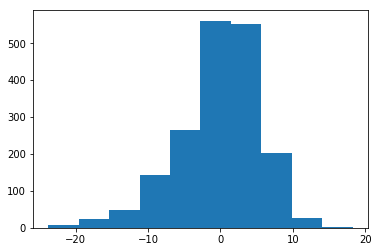

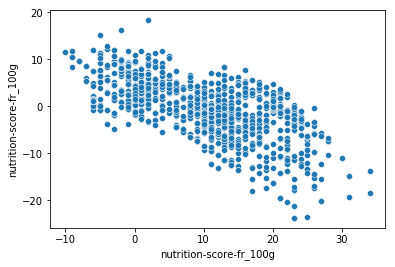

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=1000, tol=1e-4, random_state=69, selection="random")
lasso.fit(train.iloc[:,:-1], train["nutrition-score-fr_100g"])
lasso_resid = lasso.predict(test.iloc[:,:-1])-test["nutrition-score-fr_100g"]

print(np.mean((lasso_resid)**2) )
print(lasso.score(test.iloc[:,:-1], test["nutrition-score-fr_100g"]))
print(lasso.coef_, lasso.intercept_)

plt.figure()
plt.hist(lasso_resid)

plt.figure()
sns.scatterplot(test["nutrition-score-fr_100g"] , lasso_resid)

In [15]:
print(list(df_features.columns))

['ADD:acid', 'ADD:almonds', 'ADD:butter', 'ADD:cheese-culture', 'ADD:citric-acid', 'ADD:corn-syrup', 'ADD:cream', 'ADD:culture', 'ADD:enzymes', 'ADD:flavor', 'ADD:flour', 'ADD:folic-acid', 'ADD:iron', 'ADD:milk', 'ADD:mononitrate', 'ADD:natural-flavor', 'ADD:oil', 'ADD:pasteurized-milk', 'ADD:powder', 'ADD:salt', 'ADD:sea-salt', 'ADD:semolina', 'ADD:soy-lecithin', 'ADD:starch', 'ADD:sugar', 'ADD:syrup', 'ADD:thiamin-mononitrate', 'ADD:water', 'ADD:wheat-flour', 'ING:almonds', 'ING:cheese-culture', 'ING:citric-acid', 'ING:cocoa-butter', 'ING:corn', 'ING:corn-syrup', 'ING:cream', 'ING:dextrose', 'ING:enzymes', 'ING:ferrous-sulfate', 'ING:folic-acid', 'ING:iron', 'ING:milk', 'ING:natural-flavor', 'ING:niacin', 'ING:pasteurized-milk', 'ING:peanuts', 'ING:reduced-iron', 'ING:riboflavin', 'ING:salt', 'ING:sea-salt', 'ING:semolina', 'ING:soy-lecithin', 'ING:spices', 'ING:sugar', 'ING:thiamin-mononitrate', 'ING:thiamine-mononitrate', 'ING:water', 'ING:wheat', 'ING:wheat-flour', 'nutrition-scor

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor as DTR

dtr = DTR(criterion="mse", splitter="best", min_samples_leaf=1000, random_state=69)
dtr.fit(train.iloc[:,:-1], train["nutrition-score-fr_100g"])


DecisionTreeRegressor(min_samples_leaf=1000, random_state=69)

In [17]:
dtr.feature_importances_

dtr_resid = dtr.predict(test.iloc[:,:-1])-test["nutrition-score-fr_100g"]

print(np.mean((dtr_resid)**2) )
print(train.iloc[:,:-1].columns)

45.33407991205591
Index(['ADD:acid', 'ADD:almonds', 'ADD:butter', 'ADD:cheese-culture',
       'ADD:citric-acid', 'ADD:corn-syrup', 'ADD:cream', 'ADD:culture',
       'ADD:enzymes', 'ADD:flavor', 'ADD:flour', 'ADD:folic-acid', 'ADD:iron',
       'ADD:milk', 'ADD:mononitrate', 'ADD:natural-flavor', 'ADD:oil',
       'ADD:pasteurized-milk', 'ADD:powder', 'ADD:salt', 'ADD:sea-salt',
       'ADD:semolina', 'ADD:soy-lecithin', 'ADD:starch', 'ADD:sugar',
       'ADD:syrup', 'ADD:thiamin-mononitrate', 'ADD:water', 'ADD:wheat-flour',
       'ING:almonds', 'ING:cheese-culture', 'ING:citric-acid',
       'ING:cocoa-butter', 'ING:corn', 'ING:corn-syrup', 'ING:cream',
       'ING:dextrose', 'ING:enzymes', 'ING:ferrous-sulfate', 'ING:folic-acid',
       'ING:iron', 'ING:milk', 'ING:natural-flavor', 'ING:niacin',
       'ING:pasteurized-milk', 'ING:peanuts', 'ING:reduced-iron',
       'ING:riboflavin', 'ING:salt', 'ING:sea-salt', 'ING:semolina',
       'ING:soy-lecithin', 'ING:spices', 'ING:sugar',


In [18]:
from sklearn.tree import DecisionTreeClassifier as DTC

def score_to_class(input):
    out=[]
    for i in input:
#         if i<5:
#             o=0
#         elif i<15:
#             o=1
#         else:
#             o=2
        if i<6:
            o=0
        else:
            o=1
        out.append(o)
    return(np.array(out))

dtc = DTC(criterion="gini", splitter="best", max_depth=10, random_state=69)
train_class = score_to_class(train["nutrition-score-fr_100g"])
dtc.fit(train.iloc[:,:-1], train_class )
print(pd.Series(train_class).value_counts() )
print(np.mean(train_class==1))
print(np.mean(score_to_class(test["nutrition-score-fr_100g"])==1))

1    5324
0    5064
dtype: int64
0.5125144397381595
0.5359869138495092


In [19]:
from sklearn.metrics import confusion_matrix
dtc_pred = dtc.predict(train.iloc[:,:-1])
true_classes = score_to_class(train["nutrition-score-fr_100g"] )
print(pd.Series(dtc_pred).value_counts() )


print(np.mean(dtc_pred==true_classes ) )
print(confusion_matrix(true_classes, dtc_pred))

0    6028
1    4360
dtype: int64
0.8634963419329996
[[4837  227]
 [1191 4133]]


### Random Forest

In [20]:
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier

rfr = RandomForestRegressor(n_estimators=100, random_state=69)
rfr.fit(train.iloc[:,:-1], train["nutrition-score-fr_100g"])
rfr_test_pred = rfr.predict(test.iloc[:,:-1])
rfr_resid = test["nutrition-score-fr_100g"] - rfr_test_pred
print(np.mean(rfr_resid**2))

23.36024996656456


### Boosting (sklearn AdaBoost and xgboost)

In [21]:
abr = AdaBoostRegressor(n_estimators=100, learning_rate=1, random_state=69)
abr.fit(X_train_transformed, train["nutrition-score-fr_100g"])
abr_test_pred = abr.predict(X_test_transformed)
abr_resid=test["nutrition-score-fr_100g"] - abr_test_pred
print(np.mean(abr_resid**2))



NameError: name 'X_train_transformed' is not defined

In [ ]:
from xgboost import XGBRegressor as XGBR
from xgboost import XGBClassifier as XGBC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

display(test.iloc[:,:-1])
xgbr = XGBR()
xgbr.fit(train.iloc[:,:-1], train["nutrition-score-fr_100g"])
xgbr_train_pred = xgbr.predict(train.iloc[:,:-1])
xgbr_test_pred = xgbr.predict(test.iloc[:,:-1])

print(MSE( np.array(train["nutrition-score-fr_100g"]) , xgbr_train_pred ))
print(MSE( np.array(test["nutrition-score-fr_100g"]) , xgbr_test_pred ))